In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#basic EDA (Exploratory Data Analysis)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#handle missing/invalid data
#replace 0s with NaN in relevant columns
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, pd.NA)

#fill missing values with column medians
df.fillna(df.median(), inplace=True)

In [9]:
#feature scaling
#standardising features improves model performance especially for gradient-based algos
from sklearn.preprocessing import StandardScaler #StandardScaler: standardizes features by removing the mean and scaling to unit variance.

X = df.drop('Outcome', axis=1) #all input features
y = df['Outcome'] #target - whether patient has diabetes or not (0/1)

scaler=StandardScaler() #creates instance of StandardScaler (object will learn the mean and standard deviation of each feature so it can scale them)

X_scaled = scaler.fit_transform(X)

In [10]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
#train logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
#evaluate the logistic regression model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("Classification Report: \n", classification_report(y_test,y_pred))

Accuracy: 0.7532467532467533
Confusion Matrix: 
 [[82 17]
 [21 34]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



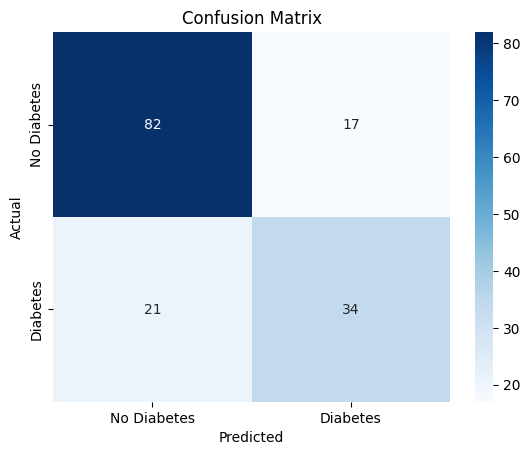

In [19]:
#confusion matrix for visualizing correct v/s incorrect predictions (Heatmaps)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

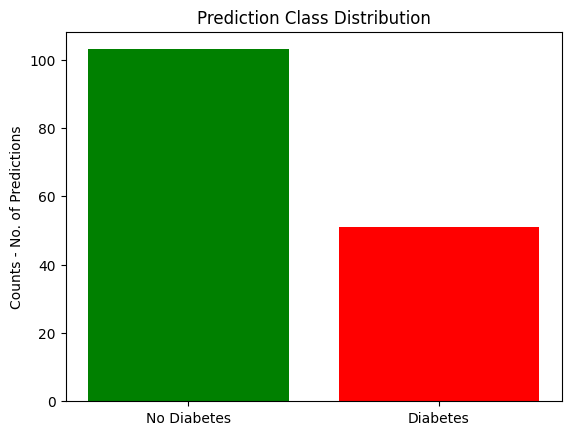

In [21]:
#bar graph of predictions
classes, counts = np.unique(y_pred, return_counts=True)
plt.bar(classes, counts, color=['green','red'])
plt.xticks([0,1],['No Diabetes', 'Diabetes'])
plt.ylabel('Counts - No. of Predictions')
plt.title('Prediction Class Distribution')
plt.show()

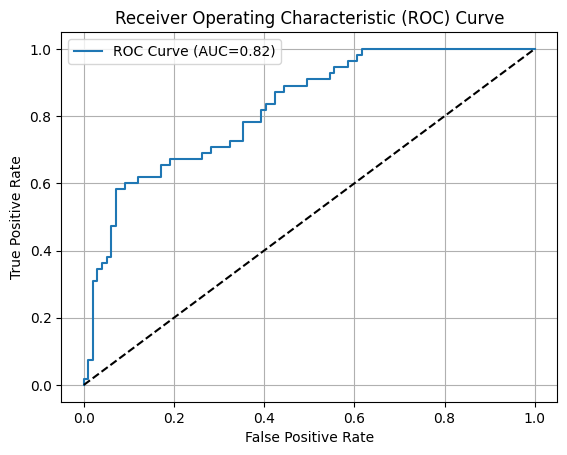

In [24]:
#ROC curve
#shows model performance across thresholds
from sklearn.metrics import roc_curve, auc

y_probs=model.predict_proba(X_test)[:,1]
#fpr:false positive rate, tpr:true poitive rate
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
#y_probs:predicted probabilities
roc_auc=auc(fpr,tpr) #this line calculates area under curve(auc) using auc fn
#higher auc generally indicates better model

plt.plot(fpr,tpr,label=f'ROC Curve (AUC={roc_auc:.2f})') #plot roc using calculated tpr and fpr values
plt.plot([0,1],[0,1],'k--') #add dashed disgonal line to plot, representing a random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()